# ChatGPT Playbook

<p>
Mal Minhas, v1.0<br>
01.03.23
</p>

## 1. Installation

This notebook leverages a the newly announced ChatGPT API which you can find out more about in the OpenAI release announcement [here](https://openai.com/blog/introducing-chatgpt-and-whisper-apis).

In order to use ChatGPT API you will need OpenAI API access.  For that you will need both an API key and an Organization ID for authentication.  You can obtain an API key from your [API Keys page](https://beta.openai.com/account/api-keys).  Organization IDs can be found on your [Organization settings](https://beta.openai.com/account/org-settings) page. The module assumes your API key and Organization ID have been stored in two respective environment variables `OPENAI_API_KEY` and `OPENAI_ORG_ID`.

In [1]:
import os

def configureEnvVars(key, org_id):
    # NB: host url is not prepended with \"https\" nor does it have a trailing slash.
    os.environ['OPENAI_API_KEY'] = key
    os.environ['OPENAI_ORG_ID'] = org_id

def getOrganisationId(file):
    with open(file) as f:
        key = f.read()
    return key
    
def getAPIKey(file):
    with open(file) as f:
        key = f.read()
    return key

configureEnvVars(getAPIKey('.openAIKey'),getOrganisationId('.openAIOrg'))

In [2]:
import os
import openai

openai.organization = os.getenv("OPENAI_ORG_ID")
openai.api_key = os.getenv("OPENAI_API_KEY")
models = openai.Model.list()
names = []
for model in models.data:
    names.append(model.get('id'))
print(names)

['babbage', 'davinci', 'gpt-3.5-turbo-0301', 'text-davinci-003', 'babbage-code-search-code', 'text-similarity-babbage-001', 'text-davinci-001', 'ada', 'curie-instruct-beta', 'babbage-code-search-text', 'babbage-similarity', 'gpt-3.5-turbo', 'code-search-babbage-text-001', 'text-embedding-ada-002', 'code-cushman-001', 'whisper-1', 'code-search-babbage-code-001', 'audio-transcribe-deprecated', 'text-ada-001', 'text-similarity-ada-001', 'text-davinci-insert-002', 'ada-code-search-code', 'ada-similarity', 'code-search-ada-text-001', 'text-search-ada-query-001', 'text-curie-001', 'text-davinci-edit-001', 'davinci-search-document', 'ada-code-search-text', 'text-search-ada-doc-001', 'code-davinci-edit-001', 'davinci-instruct-beta', 'text-similarity-curie-001', 'code-search-ada-code-001', 'ada-search-query', 'text-search-davinci-query-001', 'curie-search-query', 'code-davinci-002', 'davinci-search-query', 'text-davinci-insert-001', 'babbage-search-document', 'ada-search-document', 'text-search

Note the presence of `gpt-3.5`.  This is the model for ChatGPT per the OpenAI release announcement [here](https://openai.com/blog/introducing-chatgpt-and-whisper-apis):

In [3]:
[name for name in names if name.find('gpt') == 0]

['gpt-3.5-turbo-0301', 'gpt-3.5-turbo']

## 2. Usage

Here's the most basic invokation of the API:

In [4]:
completion = openai.ChatCompletion.create(
  model="gpt-3.5-turbo", 
  messages=[{"role": "user", "content": "Tell the world about the ChatGPT API in the style of a pirate."}]
)

Let's see what a `completion` instance is and then print it out:

In [7]:
print(type(completion))
print(dir(completion))

<class 'openai.openai_object.OpenAIObject'>
['__class__', '__class_getitem__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__ior__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__ror__', '__setattr__', '__setitem__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_previous', '_response_ms', '_retrieve_params', 'api_base', 'api_base_override', 'api_key', 'api_type', 'api_version', 'arequest', 'clear', 'construct_from', 'copy', 'engine', 'fromkeys', 'get', 'items', 'keys', 'openai_id', 'organization', 'pop', 'popitem', 'refresh_from', 'request', 'response_ms', 'setdefault', 'to_dict', 'to_dict_recursive', 'typed_api_type', 'update', 'values']


Let's dump `to_dict()`:

In [20]:
completion

<OpenAIObject chat.completion id=chatcmpl-6pREjk10524dvAV191JWEIaIenV6C at 0x105dcee80> JSON: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "message": {
        "content": "\n\nAhoy there, mates! Hoist the sails and get ready to discover the treasure of ChatGPT, me hearties! This be the most powerful and amazing chatbot API ye shall ever lay eyes on!\n\nWith ChatGPT's API, ye can create yer own chatbot that speaks like a true pirate, savvy? Make it answer questions, tell ye jokes, or even play a game o' luck with ya. Arrr, the possibilities are endless!\n\nThis jolly chatbot API be designed to be easy to use and integrate into yer app or website. And, shiver me timbers, it be powered by the most advanced AI technology. So, ye can be sure that yer chatbot will be the smartest and most helpful matey on the seven seas.\n\nSo, what are ye waiting for? Grab yer parrot and hop on board the ChatGPT API ship. It be a treasure worth more than gold doubloons!",
  

We can see the output is in the `content` field.  Let's write some utility functions to render code output in Markdown:

In [27]:
from IPython.display import display, Markdown

def renderMe(text):
    display(Markdown(text))

def completeMe(text):
    completion = openai.ChatCompletion.create(
      model = 'gpt-3.5-turbo', 
      messages = [{'role': 'user', 'content': text}]
    )
    return completion.get('choices')[0].get('message').get('content')

In [29]:
renderMe(completeMe("Write and execute Python code to draw a Mandelbrot set."))



As an AI language model, I cannot execute code on your native machine. However, I can show you how the Python code looks like for drawing a Mandelbrot set:

```python
import numpy as np
import matplotlib.pyplot as plt

# define the resolution of the plot
width, height = 1000, 1000

# define the area of the complex plane to plot
real_min, real_max = -2.0, 1.0
imag_min, imag_max = -1.5, 1.5

# create arrays for the real and imaginary parts of the complex plane
real_vals = np.linspace(real_min, real_max, width)
imag_vals = np.linspace(imag_min, imag_max, height)

# create a 2d array to store the mandelbrot set
mandelbrot = np.zeros((width, height))

# iterate over each pixel in the plot
for x in range(width):
    for y in range(height):
        # get the corresponding complex number for the current pixel
        c = complex(real_vals[x], imag_vals[y])
        # set z to the starting value z_0 = 0
        z = complex(0, 0)
        # iterate until the absolute value of z exceeds 2 or the maximum number of iterations is reached
        for i in range(1000):
            z = z**2 + c
            # escape condition
            if abs(z) > 2:
                mandelbrot[x, y] = i
                break

# plot the Mandelbrot set
plt.figure(figsize=(10,10))
plt.imshow(mandelbrot.T, cmap='magma', origin='lower', extent=(real_min,real_max,imag_min,imag_max))
plt.xlabel('Real axis')
plt.ylabel('Imaginary axis')
plt.show()
```

This code defines the resolution and area of the plot, creates arrays for the real and imaginary parts of the complex plane, and iterates over each pixel in the plot to calculate the corresponding Mandelbrot set value using the given escape condition. Finally, it plots the Mandelbrot set using `imshow` function from `matplotlib` library. 

Note that the higher the value of the maximum iterations is, the more precise the plot will be. However, this will also take longer to calculate.

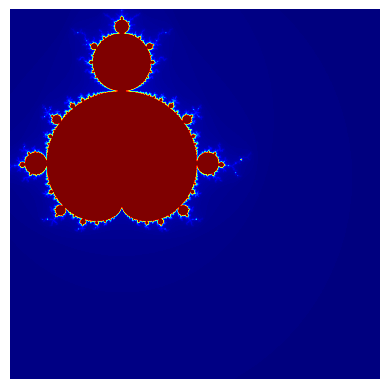

In [30]:
import numpy as np
import matplotlib.pyplot as plt
 
def mandelbrot_set(width, height, zoom=1, x_off=0, y_off=0, max_iter=255):
    # create arrays of x,y values
    x = np.linspace(-2.5, 1.5, width)
    y = np.linspace(-2, 2, height)
    real, imag = np.meshgrid(x,y)
    
    # convert x,y to complex numbers
    c = (real + 1j*imag) * zoom
    c = c - (x_off + 1j*y_off)
    
    # initialize z and output array
    z = np.zeros_like(c)
    output = np.zeros(c.shape, dtype=int)
    
    # iterate until max iter or escape criterion is met
    for i in range(max_iter):
        notdone = np.less(z.real*z.real + z.imag*z.imag, 4.0)
        output[notdone] = i
        z[notdone] = z[notdone]**2 + c[notdone]
 
    return output.T
 
# create the image
mandel = mandelbrot_set(1000,1000, zoom=0.8, x_off=-0.54015, y_off=-0.6333005)
 
# show the image
plt.imshow(mandel, cmap='jet')
plt.axis('off')
plt.show()